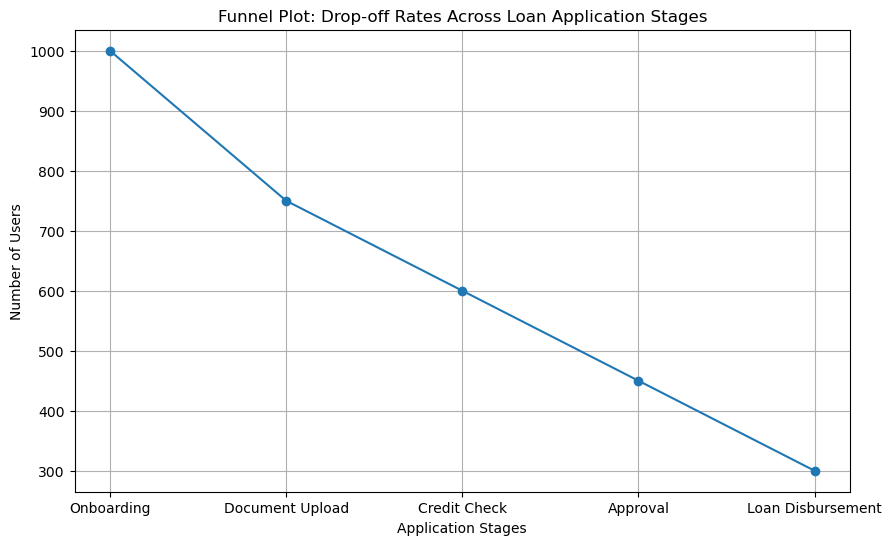

<Figure size 1200x800 with 0 Axes>

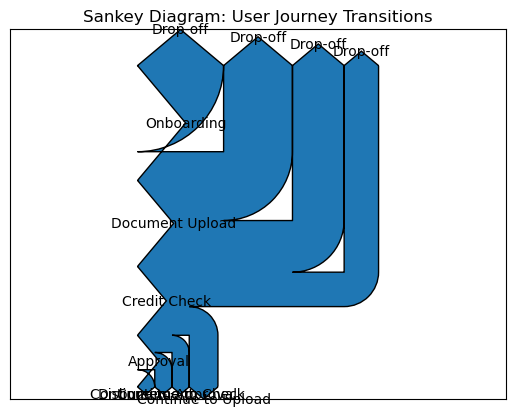

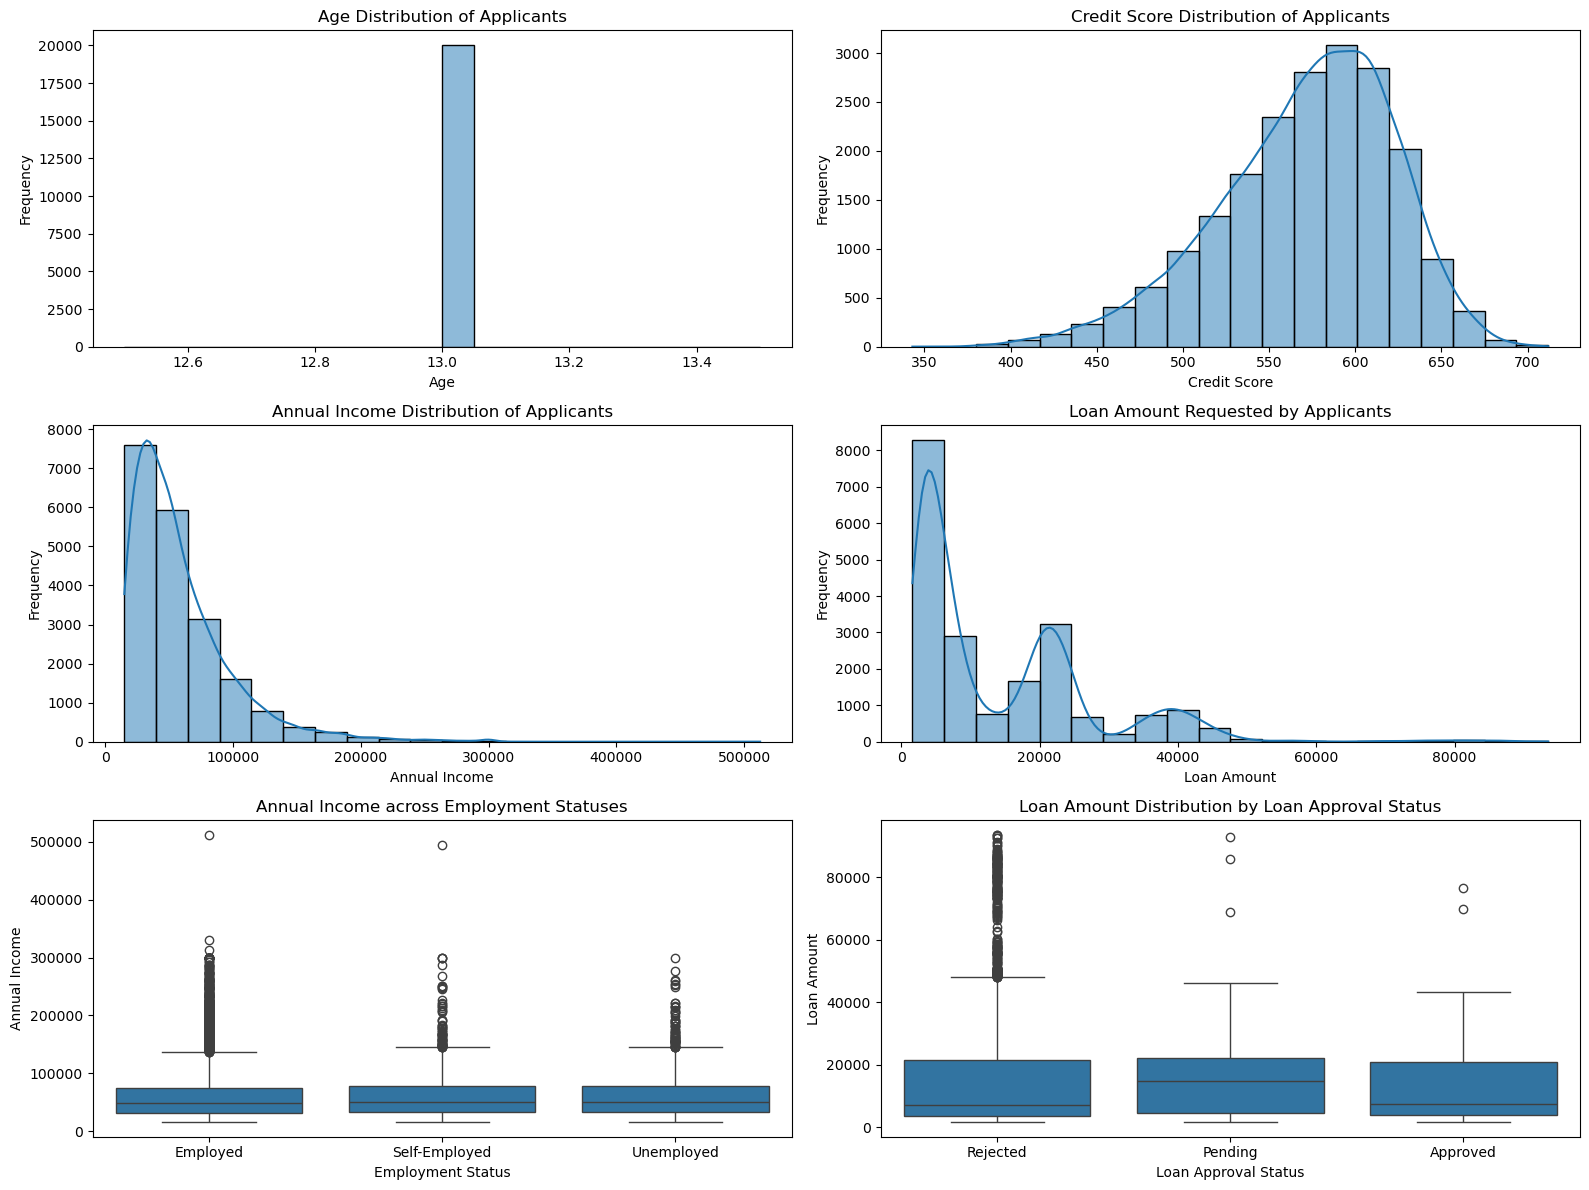

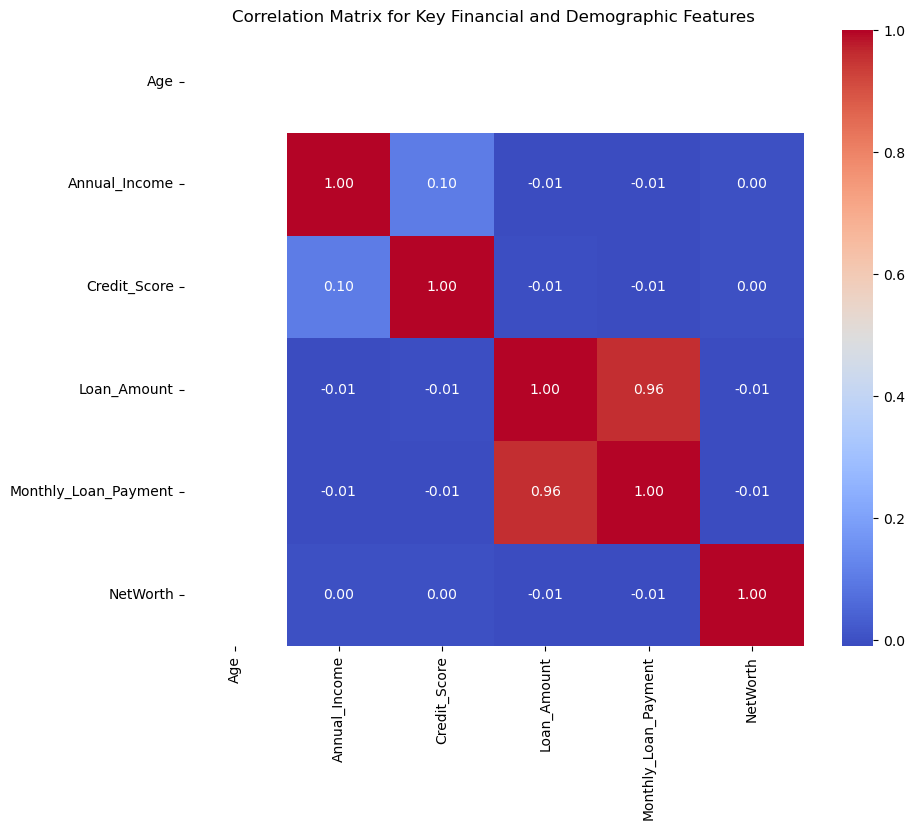

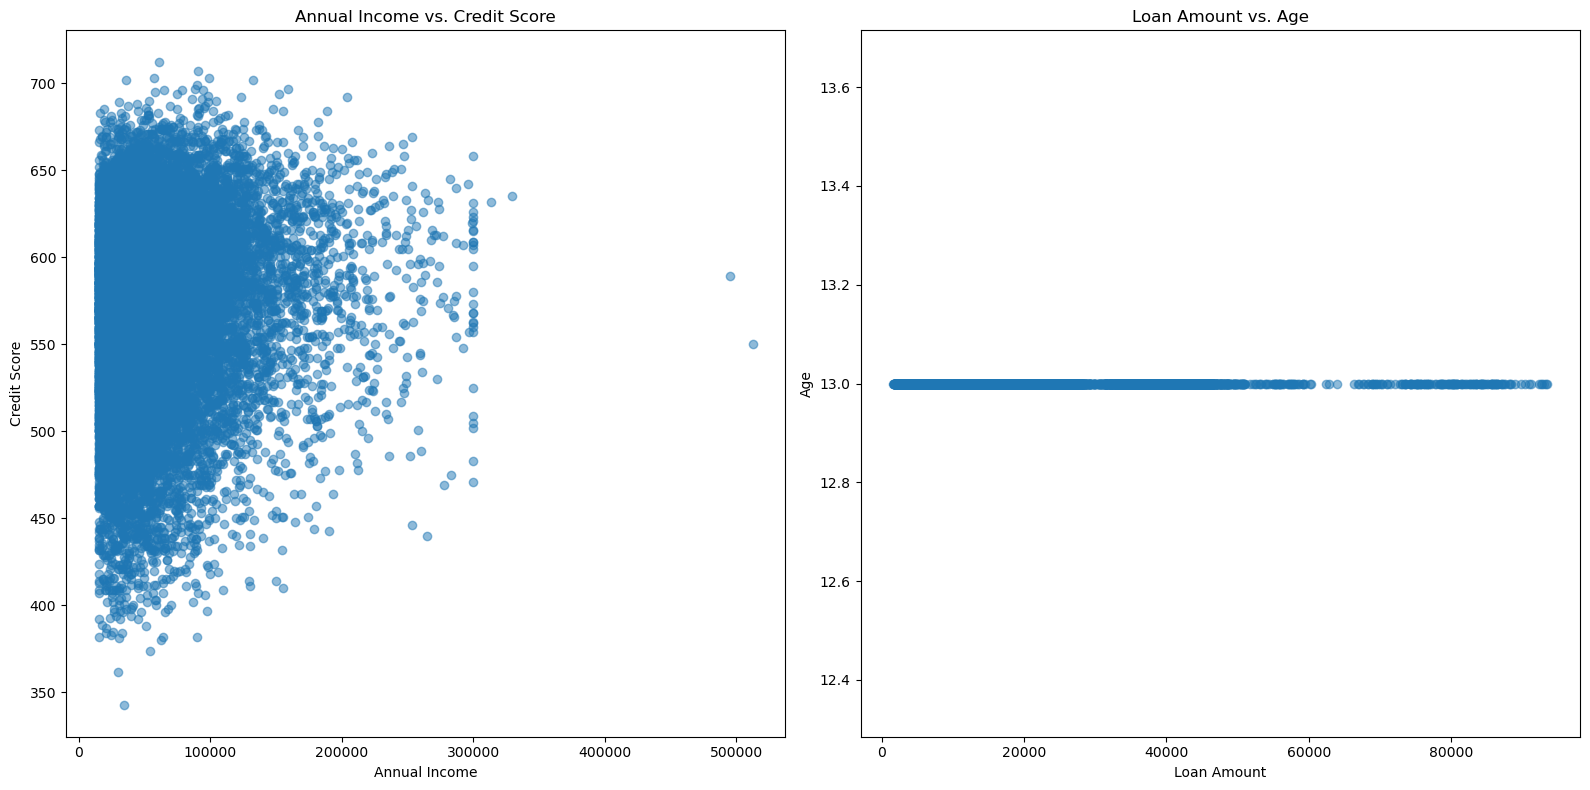

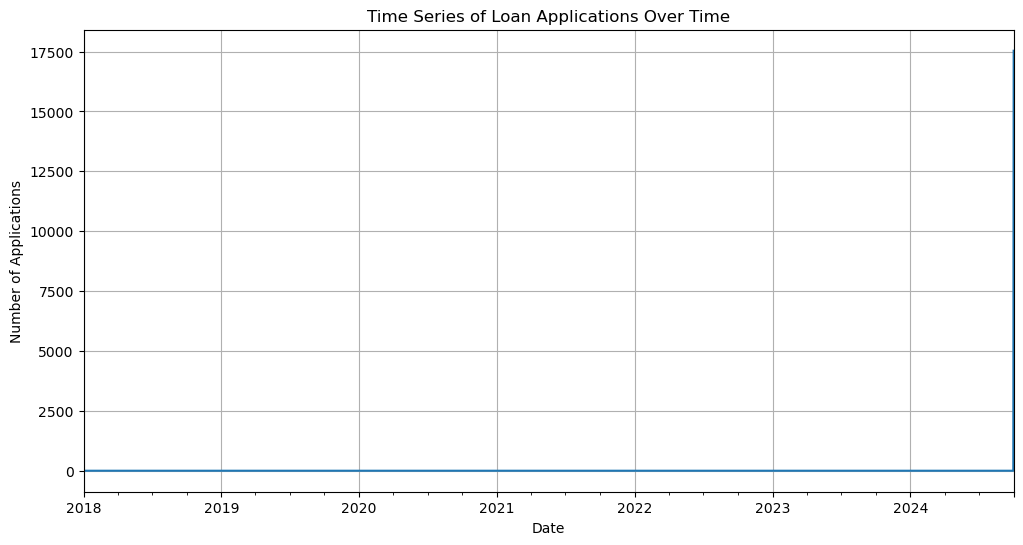

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.sankey import Sankey

# Load the synthetic auto loan application data
file_path = 'Synthetic_Auto_Loan_Application_Data_jz3.csv'
data = pd.read_csv(file_path)

# 1. Funnel Plot for User Journey Drop-off Rates
# Creating synthetic drop-off data based on typical stages
journey_stages = ["Onboarding", "Document Upload", "Credit Check", "Approval", "Loan Disbursement"]
drop_off_counts = [1000, 750, 600, 450, 300]  # Example counts at each stage

plt.figure(figsize=(10, 6))
plt.plot(journey_stages, drop_off_counts, marker='o')
plt.title("Funnel Plot: Drop-off Rates Across Loan Application Stages")
plt.xlabel("Application Stages")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()

# 2. Sankey Diagram for User Journey Transitions
plt.figure(figsize=(12, 8))
sankey = Sankey(unit=None)
sankey.add(flows=[1000, -750, -250, 750, -600, -150, 600, -450, -150, 450, -300, -150], 
            labels=['Onboarding', 'Drop-off', 'Continue to Upload', 'Document Upload', 'Drop-off', 'Continue to Check', 
                    'Credit Check', 'Drop-off', 'Continue to Approval', 'Approval', 'Drop-off', 'Disbursement'], 
            orientations=[0, 1, -1, 0, 1, -1, 0, 1, -1, 0, 1, -1])
sankey.finish()
plt.title("Sankey Diagram: User Journey Transitions")
plt.show()

# 3. Feature Distributions for key demographics and financial attributes using histograms
plt.figure(figsize=(16, 12))

# Plotting Age distribution
plt.subplot(3, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title("Age Distribution of Applicants")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Plotting Credit Score distribution
plt.subplot(3, 2, 2)
sns.histplot(data['Credit_Score'], bins=20, kde=True)
plt.title("Credit Score Distribution of Applicants")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")

# Plotting Annual Income distribution
plt.subplot(3, 2, 3)
sns.histplot(data['Annual_Income'], bins=20, kde=True)
plt.title("Annual Income Distribution of Applicants")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")

# Plotting Loan Amount distribution
plt.subplot(3, 2, 4)
sns.histplot(data['Loan_Amount'], bins=20, kde=True)
plt.title("Loan Amount Requested by Applicants")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")

# Box plot for Income vs Employment Status
plt.subplot(3, 2, 5)
sns.boxplot(x='Employment_Status', y='Annual_Income', data=data)
plt.title("Annual Income across Employment Statuses")
plt.xlabel("Employment Status")
plt.ylabel("Annual Income")

# Box plot for Loan Amount vs Loan Approval Status
plt.subplot(3, 2, 6)
sns.boxplot(x='Loan_Approved', y='Loan_Amount', data=data)
plt.title("Loan Amount Distribution by Loan Approval Status")
plt.xlabel("Loan Approval Status")
plt.ylabel("Loan Amount")

plt.tight_layout()
plt.show()

# 4. Correlation Matrix for numerical features
# Selecting key numerical features for the correlation matrix
numerical_features = ['Age', 'Annual_Income', 'Credit_Score', 'Loan_Amount', 'Monthly_Loan_Payment', 'NetWorth']
correlation_matrix = data[numerical_features].corr()

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Key Financial and Demographic Features")
plt.show()

# 5. Customer Segmentation (Clustering Previews) - Scatter plots
# Selecting features for scatter plots
clustering_features = data[['Annual_Income', 'Credit_Score', 'Age', 'Loan_Amount']].apply(pd.to_numeric, errors='coerce')
clustering_features = clustering_features.dropna()

plt.figure(figsize=(16, 8))

# Scatter plot between Annual Income and Credit Score
plt.subplot(1, 2, 1)
plt.scatter(clustering_features['Annual_Income'], clustering_features['Credit_Score'], alpha=0.5)
plt.title("Annual Income vs. Credit Score")
plt.xlabel("Annual Income")
plt.ylabel("Credit Score")

# Scatter plot between Loan Amount and Age
plt.subplot(1, 2, 2)
plt.scatter(clustering_features['Loan_Amount'], clustering_features['Age'], alpha=0.5)
plt.title("Loan Amount vs. Age")
plt.xlabel("Loan Amount")
plt.ylabel("Age")

plt.tight_layout()
plt.show()

# 6. Time Series Analysis Preview - Application trends over time
# Converting Application Date to datetime format for time series analysis
data['Application_Date'] = pd.to_datetime(data['Application_Date'], errors='coerce')

# Plotting time series of the number of loan applications over time
plt.figure(figsize=(12, 6))
data['Application_Date'].value_counts().sort_index().plot()
plt.title("Time Series of Loan Applications Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Applications")
plt.grid(True)
plt.show()
